# Lasso

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [1]:
path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Clasificador XGBoost

In [ ]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            'gamma': Real(0.0, 10.0),
            'min_child_weight': Integer(1, 10),
            'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 1000),  # Número de árboles a probar
        }

In [ ]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

# Instancia de Modelos

In [ ]:
model = LassoRegressor()
model_cls = XGBoostClassifier()
Plotters = Plotter()

nameset ='Lasso'

# Data

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

path_metric = f'{path}Multiple_Brain_Age_Clocks/pre_data/'


file_path_CN = f'{path_metric}CN_combined.xlsx'
file_path_AD = f'{path_metric}AD_combined.xlsx'
file_path_FTD = f'{path_metric}FTD_combined.xlsx'
file_path_MCI = f'{path_metric}MCI_combined.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [75]:
metrics_freq = df_CN.iloc[:, 62:280].columns.tolist()
metrics_aperiodic = df_CN.iloc[:, 1:31].columns.tolist()
metrics_complex = df_CN.iloc[:, 43:52].columns.tolist()


In [ ]:
#CN
X_CN_freq = df_CN_filtrado[metrics_freq]
X_CN_aperiodic= df_CN_filtrado[metrics_aperiodic]
X_CN_complex= df_CN_filtrado[metrics_complex]
X_CN = pd.concat([X_CN_freq, X_CN_aperiodic, X_CN_complex], axis=1)
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Esto es para limpiar los valores nulos
df_concatenado_CN_ = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False).dropna(axis=0) 

X_CN =df_concatenado_CN_.iloc[:, :-2]
X_CN_freq = df_concatenado_CN_[metrics_freq]
X_CN_aperiodic= df_concatenado_CN_[metrics_aperiodic]
X_CN_complex= df_concatenado_CN_[metrics_complex]
y_CN= df_concatenado_CN_.iloc[:, -2]   # Labels (Age)
ID_CN = df_concatenado_CN_.iloc[:, -1] 

#AD
X_AD_freq = df_AD_filtrado[metrics_freq]
X_AD_aperiodic= df_AD_filtrado[metrics_aperiodic]
X_AD_complex= df_AD_filtrado[metrics_complex]
X_AD = pd.concat([X_AD_freq, X_AD_aperiodic, X_AD_complex], axis=1)
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

df_concatenado_AD_ = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False).dropna(axis=0) 

X_AD =df_concatenado_AD_.iloc[:, :-2]
X_AD_freq = df_concatenado_AD_[metrics_freq]
X_AD_aperiodic= df_concatenado_AD_[metrics_aperiodic]
X_AD_complex= df_concatenado_AD_[metrics_complex]
y_AD= df_concatenado_AD_.iloc[:, -2]   # Labels (Age)
ID_AD = df_concatenado_AD_.iloc[:, -1] 

#FTD
X_FTD_freq = df_FTD_filtrado[metrics_freq]
X_FTD_aperiodic = df_FTD_filtrado[metrics_aperiodic]
X_FTD_complex = df_FTD_filtrado[metrics_complex]
X_FTD = pd.concat([X_FTD_freq, X_FTD_aperiodic, X_FTD_complex], axis=1)
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

df_concatenado_FTD_ = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False).dropna(axis=0) 

X_FTD_freq = df_concatenado_FTD_[metrics_freq]
X_FTD_aperiodic = df_concatenado_FTD_[metrics_aperiodic]
X_FTD_complex = df_concatenado_FTD_[metrics_complex]
X_FTD =df_concatenado_FTD_.iloc[:, :-2]
y_FTD= df_concatenado_FTD_.iloc[:, -2]   # Labels (Age)
ID_FTD = df_concatenado_FTD_.iloc[:, -1] 

#MCI
X_MCI_freq = df_MCI_filtrado[metrics_freq]
X_MCI_aperiodic = df_MCI_filtrado[metrics_aperiodic]
X_MCI_complex = df_MCI_filtrado[metrics_complex]
X_MCI = pd.concat([X_MCI_freq, X_MCI_aperiodic, X_MCI_complex], axis=1)
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

df_concatenado_MCI_ = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False).dropna(axis=0) 
X_MCI_freq = df_concatenado_MCI_[metrics_freq]
X_MCI_aperiodic = df_concatenado_MCI_[metrics_aperiodic]
X_MCI_complex = df_concatenado_MCI_[metrics_complex]
X_MCI =df_concatenado_MCI_.iloc[:, :-2]
y_MCI= df_concatenado_MCI_.iloc[:, -2]   # Labels (Age)
ID_MCI = df_concatenado_MCI_.iloc[:, -1] 


############################
#X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)



####################################
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)

df_patient = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI]

# Todas las metricas

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [34]:
with open(f'results_model/opt_Lasso.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

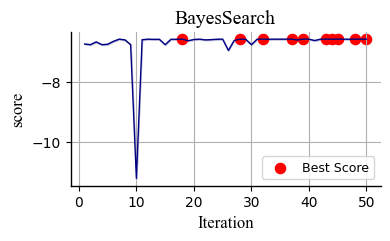

Top 1: Iteration 18, Score -6.573695033397025
Top 2: Iteration 50, Score -6.5737000428775305
Top 3: Iteration 39, Score -6.57372181937922
Top 4: Iteration 45, Score -6.573726487999148
Top 5: Iteration 37, Score -6.5737285500367975
Top 6: Iteration 44, Score -6.573739734368604
Top 7: Iteration 43, Score -6.573739750967135
Top 8: Iteration 28, Score -6.573746265075241
Top 9: Iteration 32, Score -6.573748880566827
Top 10: Iteration 48, Score -6.57375026877485


In [62]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [63]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.29732929195632174, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.2965511659732277, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.29568057708942064, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.2954926279076697, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.29540924791958095, 'max_iter': 9762, 'tol': 1e-05},
 {'alpha': 0.29496196063492425, 'max_iter': 1428, 'tol': 1e-05},
 {'alpha': 0.2949612964277285, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.2978716986674816, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.28908357472306967, 'max_iter': 8675, 'tol': 1e-05},
 {'alpha': 0.2902298648791779, 'max_iter': 9837, 'tol': 1e-05}]

In [64]:
results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test= model.trainer_2(X=X_CN, y=y_CN, ID=ID_CN, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:399: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:401: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_test

In [65]:
results_labels_df_AD_test, results_per_fold_AD_test = model.test(X=X_AD, y=y_AD, ID= ID_AD, n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test = model.test(X=X_FTD, y=y_FTD, ID= ID_FTD, n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test = model.test(X=X_MCI, y=y_MCI, ID= ID_MCI, n_splits=10, n_iterations=20,result_model=results_model)

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:469: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:469: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ign

In [66]:
results_labels_df_total = [results_labels_df_CN_test, results_labels_df_AD_test, results_labels_df_FTD_test,results_labels_df_MCI_test]
results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


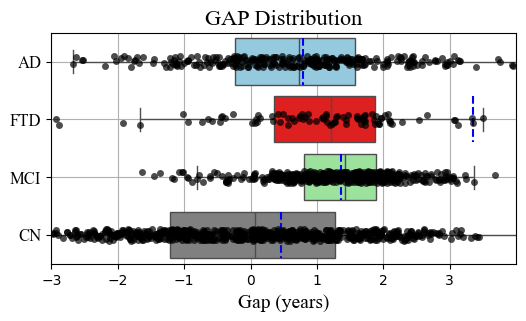

In [67]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo':  ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

CN - Pendiente: 1.1108079945768803, Intercepto: -6.870410524713118
AD - Pendiente: 0.9587387860040967, Intercepto: 3.871817510025953
FTD - Pendiente: 0.5514680025750452, Intercepto: 34.2031888606344
MCI - Pendiente: 0.9498796789047435, Intercepto: 4.738618204212959


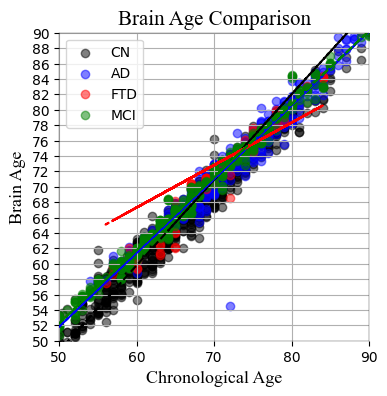

In [68]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred_corrected']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred_corrected']].copy()
results_avg_FTD     = results_avg_list[2][['y_labels', 'y_pred_corrected']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred_corrected']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green'}
labels = ['CN', 'AD', 'FTD', 'MCI']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=50,x_max_limit=90,y_max_limit=90,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)

# Agrupacion por regiones

In [ ]:
import pandas as pd

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right'
]

# Crear un diccionario para almacenar las columnas por región
columnas_por_region = {}

for region in nombres_regiones:
    # Filtrar columnas que contienen el nombre de la región
    columnas_por_region[region] = [col for col in df_concatenado_CN.columns if region in col]

# Ver el resultado
for region, columnas in columnas_por_region.items():
    print(f"Región: {region}")
    print(f"Columnas: {columnas}\n")


Región: OCC_left
Columnas: ['Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Beta1_canon_EPP_OCC_left', 'Beta1_canon_RPD_OCC_left', 'Beta2_canon_EPP_OCC_left', 'IAF_OCC_left', 'Slope_OCC_left', 'Knee_OCC_left', 'Offset_OCC_left', 'SSV_OCC_left']

Región: OCC_right
Columnas: ['Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_OCC_right', 'Beta1_canon_EPP_OCC_right', 'Beta1_canon_RPD_OCC_right', 'Beta2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Slope_OCC_right', 'Knee_OCC_right', 'Offset_OCC_right', 'SSV_OCC_right']

Región: HPC_left
Columnas: ['Delta_canon_EPP_HPC_left', 'Delta_canon_RPD_HPC_left', 'Delta_subj_spec_EPP_HPC_left', 'Delta_subj_spec_RPD_HPC_left', 'Theta_canon_EPP_HPC_left', 'Theta_canon_RPD_HPC_left', 'Theta_subj_spec_EPP_HP

In [84]:
# Listas para almacenar los modelos y los mejores parámetros
opt_models = []
best_params = []

# Iterar sobre las regiones
for region in nombres_regiones:
    # Nombre de las columnas asociadas a la región
    columnas_region = columnas_por_region[region]
    
    # Aplicar el modelo para las columnas de la región
    opt_model, best_params_region = model.search_best_model(
        X=X_CN_scaled[columnas_region], 
        y=y_CN, 
        n_iter_=50, 
        scoring_metric='r2'
    )
    
    # Agregar los resultados a las listas
    opt_models.append(opt_model)
    best_params.append(best_params_region)

    print(f"Modelo y parámetros para {region} procesados.")  # Seguimiento del progreso

# Mostrar un resumen
print("Procesamiento completado.")
print(f"Se ajustaron {len(opt_models)} modelos.")


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [135]:
with open(f'results_model/opt_Lasso_per_region.pickle', 'wb') as file:
        pickle.dump(opt_models, file)

In [ ]:
with open(f'results_model/opt_Lasso_per_region.pickle', 'rb') as file:
    opt_models= pickle.load(file)

In [94]:
# Diccionario para almacenar los mejores hiperparámetros por región
best_params_all_regions = {}

# Iterar sobre las regiones y los modelos optimizados
for region, opt_model in zip(nombres_regiones, opt_models):
    # Obtener los mejores hiperparámetros para el modelo de la región
    best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
    
    # Guardar los resultados en el diccionario
    best_params_all_regions[region] = best_params_

    print(f"Mejores hiperparámetros procesados para {region}.")  # Seguimiento del progreso

# Mostrar un resumen
print("Procesamiento completado.")


Mejores hiperparámetros procesados para OCC_left.
Mejores hiperparámetros procesados para OCC_right.
Mejores hiperparámetros procesados para HPC_left.
Mejores hiperparámetros procesados para HPC_right.
Mejores hiperparámetros procesados para PARIET_left.
Mejores hiperparámetros procesados para PARIET_right.
Mejores hiperparámetros procesados para CING_left.
Mejores hiperparámetros procesados para CING_right.
Mejores hiperparámetros procesados para ORB_left.
Mejores hiperparámetros procesados para ORB_right.
Mejores hiperparámetros procesados para INS_left.
Mejores hiperparámetros procesados para INS_right.
Mejores hiperparámetros procesados para IFG_left.
Mejores hiperparámetros procesados para IFG_right.
Mejores hiperparámetros procesados para SFG_left.
Mejores hiperparámetros procesados para SFG_right.
Mejores hiperparámetros procesados para MFG_left.
Mejores hiperparámetros procesados para MFG_right.
Procesamiento completado.


In [ ]:
# Diccionarios para almacenar los resultados de cada región
results_labels_CN_train = {}
results_labels_CN_test = {}
results_models = {}
results_folds_CN_train = {}
results_folds_CN_test = {}

# Iterar sobre las regiones
for region in nombres_regiones:
    # Obtener las columnas correspondientes a la región
    columnas_region = columnas_por_region[region]
    
    # Obtener los mejores parámetros para la región
    best_params_region = best_params_all_regions[region][0]
    
    # Entrenar el modelo con `trainer_2`
    results_labels_CN_train[region], results_labels_CN_test[region], results_models[region], \
    results_folds_CN_train[region], results_folds_CN_test[region] = model.trainer_2(
        X=X_CN[columnas_region],
        y=y_CN,
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params_region
    )
    
    print(f"Modelo entrenado para la región {region}.")  # Seguimiento del progreso

# Mostrar un resumen
print("Entrenamiento completado para todas las regiones.")


In [136]:
import pickle

results_training = [results_labels_CN_train, results_labels_CN_test, results_models, 
           results_folds_CN_train, results_folds_CN_test]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_CN_train, results_labels_CN_test, results_models, results_folds_CN_train, results_folds_CN_test = loaded_results

In [ ]:
# Diccionarios para almacenar resultados por región y paciente
results_labels_test = {'AD': {}, 'FTD': {}, 'MCI': {}}
results_folds_test = {'AD': {}, 'FTD': {}, 'MCI': {}}

# Iterar sobre las regiones
for region in nombres_regiones:
    columnas_region = columnas_por_region[region]
    modelo_region = results_models[region]
    
    # Test para pacientes AD
    results_labels_test['AD'][region], results_folds_test['AD'][region] = model.test(
        X=X_AD[columnas_region],
        y=y_AD,
        ID=ID_AD,
        n_splits=10,
        n_iterations=20,
        result_model=modelo_region
    )
    
    # Test para pacientes FTD
    results_labels_test['FTD'][region], results_folds_test['FTD'][region] = model.test(
        X=X_FTD[columnas_region],
        y=y_FTD,
        ID=ID_FTD,
        n_splits=10,
        n_iterations=20,
        result_model=modelo_region
    )
    
    # Test para pacientes MCI
    results_labels_test['MCI'][region], results_folds_test['MCI'][region] = model.test(
        X=X_MCI[columnas_region],
        y=y_MCI,
        ID=ID_MCI,
        n_splits=10,
        n_iterations=20,
        result_model=modelo_region
    )
    
    print(f"Pruebas realizadas para la región {region}.")  # Seguimiento del progreso

# Mostrar un resumen
print("Pruebas completadas para todas las regiones y pacientes.")


In [120]:
# Diccionario para almacenar los resultados promedio por región
results_avg_per_region = {}

# Iterar sobre todas las regiones
for region in nombres_regiones:
    # Consolidar resultados de CN, AD, FTD, y MCI para la región actual
    results_labels_df_total = [
        results_labels_CN_test[region],
        results_labels_test['AD'][region],
        results_labels_test['FTD'][region],
        results_labels_test['MCI'][region]
    ]
    
    # Calcular el promedio utilizando avg_list
    results_avg_per_region[region] = model.avg_list(results_labels_df_total)
    
    print(f"Promedios calculados para la región {region}.")  # Seguimiento del progreso

# Mostrar un resumen final
print("Cálculo de promedios completado para todas las regiones.")


Promedios calculados para la región OCC_left.
Promedios calculados para la región OCC_right.
Promedios calculados para la región HPC_left.
Promedios calculados para la región HPC_right.
Promedios calculados para la región PARIET_left.
Promedios calculados para la región PARIET_right.
Promedios calculados para la región CING_left.
Promedios calculados para la región CING_right.
Promedios calculados para la región ORB_left.
Promedios calculados para la región ORB_right.
Promedios calculados para la región INS_left.
Promedios calculados para la región INS_right.
Promedios calculados para la región IFG_left.
Promedios calculados para la región IFG_right.
Promedios calculados para la región SFG_left.
Promedios calculados para la región SFG_right.
Promedios calculados para la región MFG_left.
Promedios calculados para la región MFG_right.
Cálculo de promedios completado para todas las regiones.


In [193]:
# Inicialización de los dataframes para cada grupo
df_results_clocks_CN = df_concatenado_CN.iloc[:, -2:]
df_results_clocks_AD = df_concatenado_AD.iloc[:, -2:]
df_results_clocks_FTD = df_concatenado_FTD.iloc[:, -2:]
df_results_clocks_MCI = df_concatenado_MCI.iloc[:, -2:]

# Listado de los grupos y sus respectivos dataframes
grupos = {'CN': df_results_clocks_CN, 'AD': df_results_clocks_AD, 'FTD': df_results_clocks_FTD, 'MCI': df_results_clocks_MCI}

# Iterar sobre todas las regiones
for region in nombres_regiones:
    # Iterar sobre todos los grupos
    for grupo, df_grupo in grupos.items():
        # Obtener el índice correspondiente al grupo
        index_grupo = {'CN': 0, 'AD': 1, 'FTD': 2, 'MCI': 3}[grupo]
        
        # Seleccionar solo las columnas necesarias y renombrarlas
        temp_df = results_avg_per_region[region][index_grupo][['ID-unique', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected']].rename(
            columns={
                'y_pred': f'y_pred_{region}',
                'y_pred_corrected': f'y_pred_corrected_{region}',
                'GAP': f'GAP_{region}',
                'GAP_corrected': f'GAP_corrected_{region}'
            }
        )
        
        # Realizar el merge con el dataframe correspondiente al grupo
        df_grupo = pd.merge(
            df_grupo,
            temp_df,
            on='ID-unique',
            how='inner'
        )
        
        # Actualizar el dataframe del grupo
        grupos[grupo] = df_grupo

# Los dataframes con los resultados para cada grupo (CN, AD, FTD, MCI) estarán actualizados
df_results_clocks_CN = grupos['CN']
df_results_clocks_AD = grupos['AD']
df_results_clocks_FTD = grupos['FTD']
df_results_clocks_MCI = grupos['MCI']


In [203]:
df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID',  'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_CN_combined = df_results_clocks_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID',  'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_results_clocks_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID_2',  'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_seleccion = df_FTD_seleccion.rename(columns={'Country_ID_2': 'Country_ID'})
df_FTD_combined = df_results_clocks_FTD.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID',  'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_results_clocks_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')


In [205]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_results.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_results.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_results.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_results.xlsx', index=False)

In [142]:
for region in nombres_regiones:
    print(region)

OCC_left
OCC_right
HPC_left
HPC_right
PARIET_left
PARIET_right
CING_left
CING_right
ORB_left
ORB_right
INS_left
INS_right
IFG_left
IFG_right
SFG_left
SFG_right
MFG_left
MFG_right


Creando gráfico para la región OCC_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


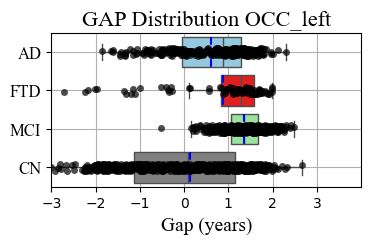

Creando gráfico para la región OCC_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


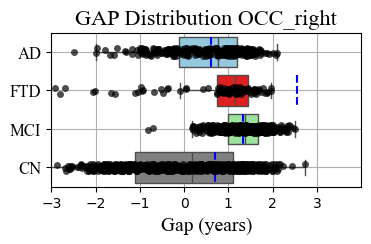

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,


Creando gráfico para la región HPC_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


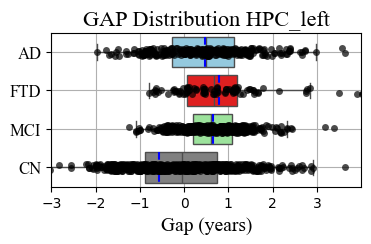

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


Creando gráfico para la región HPC_right...


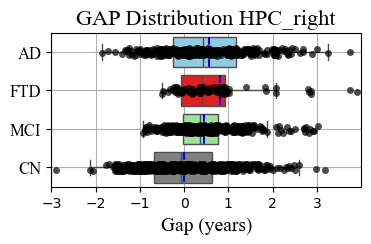

Creando gráfico para la región PARIET_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


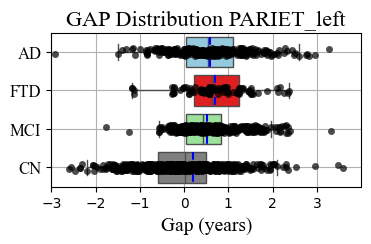

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


Creando gráfico para la región PARIET_right...


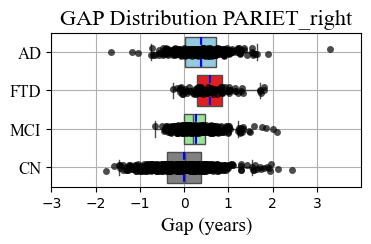

Creando gráfico para la región CING_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


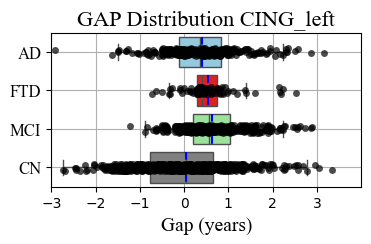

Creando gráfico para la región CING_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


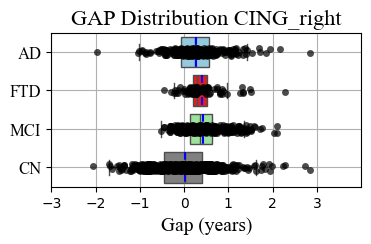

Creando gráfico para la región ORB_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


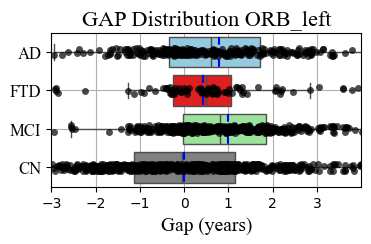

Creando gráfico para la región ORB_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


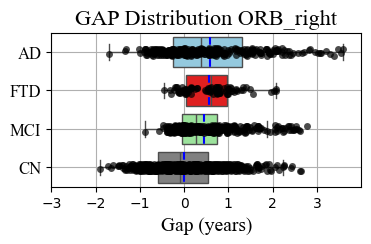

Creando gráfico para la región INS_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


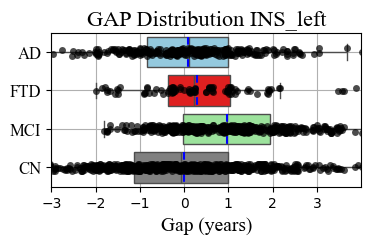

Creando gráfico para la región INS_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


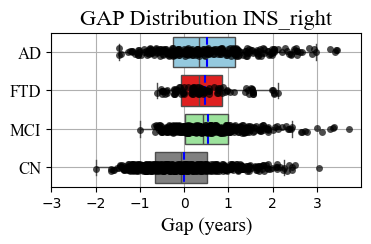

Creando gráfico para la región IFG_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


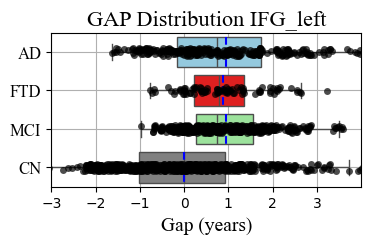

Creando gráfico para la región IFG_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


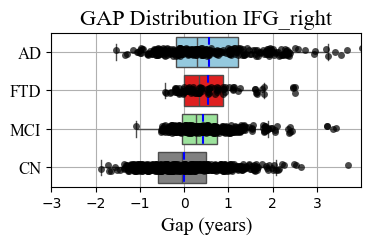

Creando gráfico para la región SFG_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


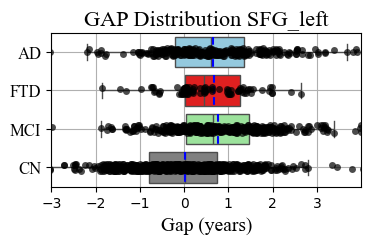

Creando gráfico para la región SFG_right...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


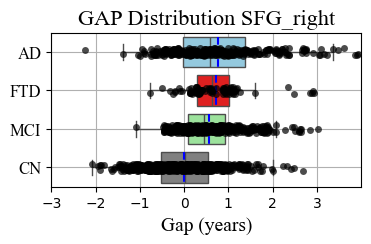

Creando gráfico para la región MFG_left...


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


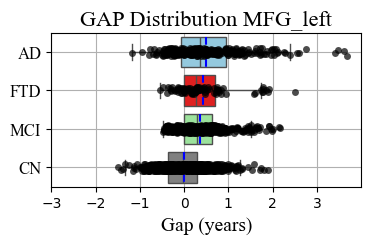

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


Creando gráfico para la región MFG_right...


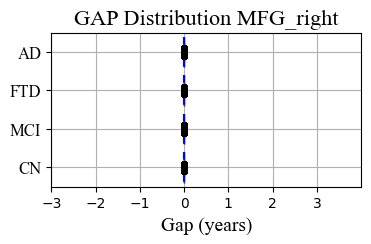

In [130]:
for region in nombres_regiones:
    # Extraer los valores corregidos de GAP para cada grupo
    corrected_gap_AD = pd.to_numeric(results_avg_per_region[region][1]['GAP_corrected'])
    corrected_gap_FTD = pd.to_numeric(results_avg_per_region[region][2]['GAP_corrected'])
    corrected_gap_MCI = pd.to_numeric(results_avg_per_region[region][3]['GAP_corrected'])
    corrected_gap_CN_test = pd.to_numeric(results_avg_per_region[region][0]['GAP_corrected'])

    # Crear el DataFrame en formato largo
    data = {
        'Error': np.concatenate([corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
        'Grupo': (['AD'] * len(corrected_gap_AD) +
                  ['FTD'] * len(corrected_gap_FTD) +
                  ['MCI'] * len(corrected_gap_MCI) +
                  ['CN'] * len(corrected_gap_CN_test))
    }

    df_errors = pd.DataFrame(data)

    # Definir la paleta de colores personalizada
    colores_personalizados = {
        'AD': 'skyblue',
        'FTD': 'red',
        'MCI': 'lightgreen',
        'CN': 'gray'
    }

    # Crear el gráfico
    print(f"Creando gráfico para la región {region}...")  # Seguimiento del progreso
    Plotters.plot_gap_distribution(
        df_errors, 
        colores_personalizados,
        x_size=4, 
        y_size=2,
        title=f"GAP Distribution {region}", 
        font='Times New Roman', 
        weight='normal', 
        xlabel='Gap (years)', 
        x_limits=(-3, 4), 
        fontsize=14
    )


# Clasificacion

In [210]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [211]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

In [213]:
import pandas as pd

# Cargar los dataframes desde los archivos Excel
df_CN_results_ = pd.read_excel('results/df_CN_results.xlsx')
df_AD_results_ = pd.read_excel('results/df_AD_results.xlsx')
df_FTD_results_ = pd.read_excel('results/df_FTD_results.xlsx')
df_MCI_results_ = pd.read_excel('results/df_MCI_results.xlsx')

# Agregar la columna Diagnosis a cada dataframe antes de concatenar
df_CN_results_['Diagnosis'] = 0  # CN
df_AD_results_['Diagnosis'] = 1  # AD
df_FTD_results_['Diagnosis'] = 1  # FTD
df_MCI_results_['Diagnosis'] = 1  # MCI

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

df_results_combined = pd.concat([df_CN_results_, df_AD_results_, df_FTD_results_, df_MCI_results_], ignore_index=True)
df_results_combined['ID-unique-2'] = range(len(df_results_combined))

X = df_results_combined[gap_corrected_columns]
y = df_results_combined['Diagnosis']
id = df_results_combined['ID-unique-2']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)

df_train, df_test = train_test_split(
    df_concatenado, test_size=0.5, random_state=42, stratify=df_concatenado['Diagnosis']
)

# Combinar nuevamente train y test para obtener el dataset completo desordenado
df_desordenado = pd.concat([df_train, df_test]).reset_index(drop=True)

In [223]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=df_desordenado[gap_corrected_columns], y=df_desordenado['Diagnosis'], n_iter_=30, scoring_metric='accuracy')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [224]:
best_params_cls_ = model_cls.best_hyper(num_best=10, opt_model=opt_model_cls, num_max=50)
best_params_cls_

[{'colsample_bytree': 0.9,
  'eval_metric': 'error',
  'learning_rate': 0.1,
  'max_depth': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1.0,
  'reg_lambda': 1.0,
  'subsample': 1.0},
 {'colsample_bytree': 0.9,
  'eval_metric': 'error',
  'learning_rate': 0.2,
  'max_depth': 5,
  'objective': 'binary:logistic',
  'reg_alpha': 1.0,
  'reg_lambda': 1.0,
  'subsample': 0.8},
 {'colsample_bytree': 0.9,
  'eval_metric': 'logloss',
  'learning_rate': 0.2,
  'max_depth': 5,
  'objective': 'binary:logistic',
  'reg_alpha': 0.1,
  'reg_lambda': 1.0,
  'subsample': 1.0},
 {'colsample_bytree': 1.0,
  'eval_metric': 'auc',
  'learning_rate': 0.2,
  'max_depth': 5,
  'objective': 'binary:logistic',
  'reg_alpha': 1.0,
  'reg_lambda': 0.1,
  'subsample': 1.0},
 {'colsample_bytree': 1.0,
  'eval_metric': 'auc',
  'learning_rate': 0.2,
  'max_depth': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1.0,
  'reg_lambda': 1.0,
  'subsample': 0.9},
 {'colsample_bytree': 1.0,
  'eval_metric': 'au

In [225]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(df=df_desordenado, n_splits=10, n_iterations=20, params_=best_params_cls_[0], scaler=3, id='ID-unique')

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_CN_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_classifier.py:199: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_CN_

In [226]:
results_labels_df_total = [results_labels_df_test]

In [227]:
results_avg_list = model_cls.avg_list_threshold(results_labels_df_total, id='ID-unique')
print(results_avg_list[0])

      ID-unique y_labels  y_pred    y_prob
0             0      0.0       1  0.825976
1             1      0.0       1  0.749281
2             2      0.0       1  0.709300
3             3      0.0       1  0.746276
4             4      0.0       1  0.488989
...         ...      ...     ...       ...
1546       1546      1.0       1  0.898038
1547       1547      1.0       1  0.921566
1548       1548      1.0       1  0.751507
1549       1549      1.0       1  0.951748
1550       1550      1.0       1  0.810668

[1551 rows x 4 columns]


In [228]:
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Suponiendo que `y_prob` es una probabilidad predicha; aquí se usa una probabilidad de ejemplo.
y_true = results_avg_list[0]['y_labels']
y_pred = results_avg_list[0]['y_pred']
y_prob = results_avg_list[0]['y_prob'] # Reemplazar con las probabilidades reales

# Definir la función de métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_value = auc(fpr, tpr)
    
    # Otras métricas de clasificación
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        "AUC": auc_value,
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Confusion Matrix": cm
    }




In [229]:
y_true = y_true.astype(int)

In [230]:
# Calcular las métricas
metrics = clf_metrics(y_true, y_pred, y_prob)

# Mostrar los resultados
metrics

{'AUC': 0.8639005200243128,
 'FPR': array([0.        , 0.        , 0.        , 0.00147059, 0.00147059,
        0.00294118, 0.00294118, 0.00588235, 0.00588235, 0.00882353,
        0.00882353, 0.01029412, 0.01029412, 0.01176471, 0.01176471,
        0.01323529, 0.01323529, 0.01470588, 0.01470588, 0.01617647,
        0.01617647, 0.01764706, 0.01764706, 0.02058824, 0.02058824,
        0.02205882, 0.02205882, 0.02352941, 0.02352941, 0.025     ,
        0.025     , 0.02647059, 0.02647059, 0.02941176, 0.02941176,
        0.03088235, 0.03088235, 0.03235294, 0.03235294, 0.03382353,
        0.03382353, 0.03529412, 0.03529412, 0.03676471, 0.03676471,
        0.03970588, 0.03970588, 0.04117647, 0.04117647, 0.04264706,
        0.04264706, 0.04411765, 0.04411765, 0.04705882, 0.04705882,
        0.04852941, 0.04852941, 0.05147059, 0.05147059, 0.05294118,
        0.05294118, 0.05441176, 0.05441176, 0.05588235, 0.05588235,
        0.05735294, 0.05735294, 0.06029412, 0.06029412, 0.06323529,
        0.063

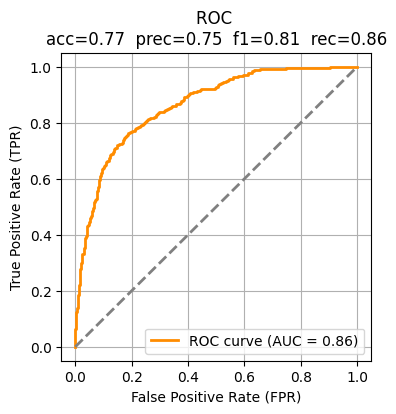

In [231]:
import matplotlib.pyplot as plt

def plot_roc_curve(metrics):
    """
    Función para graficar la curva ROC con FPR, TPR y el AUC en el título.

    Parámetros:
    - metrics: diccionario que contiene 'FPR', 'TPR' y 'AUC'.
    """
    title='ROC Curve'
    title_metrics = f'ROC \nacc={metrics['Accuracy']:.2f}  prec={metrics['Precision']:.2f}  f1={metrics['F1 Score']:.2f}  rec={metrics['Recall']:.2f}'

    plt.figure(figsize=(4, 4))
    plt.plot(metrics['FPR'], metrics['TPR'], color='darkorange', lw=2, label=f'ROC curve (AUC = {metrics["AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Línea diagonal de referencia
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title_metrics)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Llamada a la función
plot_roc_curve(metrics)


In [232]:
results_model['model'][0].get_booster().get_score()

{'GAP_corrected_OCC_left': 82.0,
 'GAP_corrected_OCC_right': 74.0,
 'GAP_corrected_HPC_left': 58.0,
 'GAP_corrected_HPC_right': 83.0,
 'GAP_corrected_PARIET_left': 31.0,
 'GAP_corrected_PARIET_right': 75.0,
 'GAP_corrected_CING_left': 44.0,
 'GAP_corrected_CING_right': 85.0,
 'GAP_corrected_ORB_left': 63.0,
 'GAP_corrected_ORB_right': 77.0,
 'GAP_corrected_INS_left': 73.0,
 'GAP_corrected_INS_right': 39.0,
 'GAP_corrected_IFG_left': 76.0,
 'GAP_corrected_IFG_right': 59.0,
 'GAP_corrected_SFG_left': 50.0,
 'GAP_corrected_SFG_right': 113.0,
 'GAP_corrected_MFG_left': 75.0,
 'GAP_corrected_MFG_right': 31.0}

In [233]:
count_class_0 = df_concatenado['Diagnosis'].value_counts().get(0, 0)
print(f"Cantidad de registros con Diagnosis = 0: {count_class_0}")


Cantidad de registros con Diagnosis = 0: 680


In [234]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)

# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase


f_scores = [81.125, 76.385, 65.445, 67.71, 44.025, 72.99, 58.63, 63.765, 71.155, 63.435, 87.18, 37.93, 84.015, 50.655, 57.655, 89.72, 82.015, 33.675]
f_score_std = [8.323423274110239, 7.515103126371586, 8.489226996611647, 8.74962284901469, 7.339235314390727, 7.6843932746834325, 9.046717636800656, 7.863826994536439, 8.492406902639557, 6.711614932339311, 8.865528749036912, 6.8807775723387525, 8.50380944048019, 7.949589612049167, 8.0818299289208, 8.270525980855151, 7.846959602291835, 5.93037730671498]


In [236]:
np.array(metrics['Confusion Matrix'])

array([[435, 245],
       [118, 753]], dtype=int64)

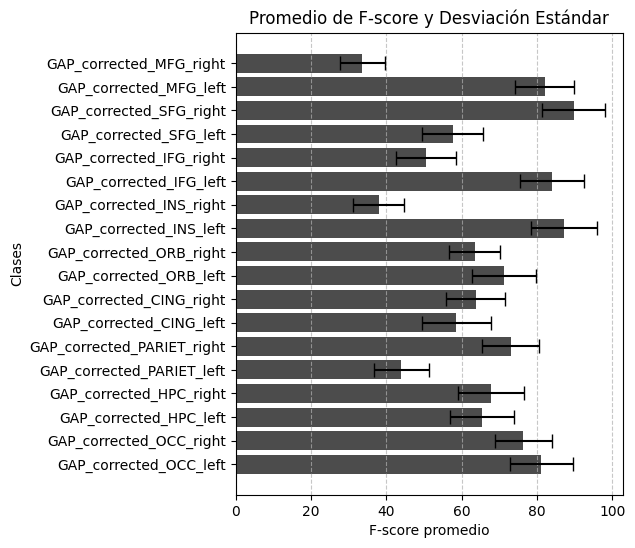

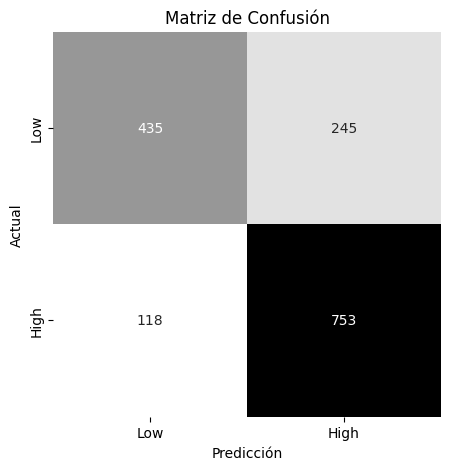

In [249]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = metrics['Confusion Matrix']

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(5, 6))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
